In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
file_path = "data/zhvi_data.csv"
home_values_df=pd.read_csv(file_path)

home_values_df.head()

,RegionName,RegionType,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2017-01-31,2017-02-28,2017-03-31,2017-04-30,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,Los Angeles County,County,CA,Los Angeles-Long Beach-Anaheim,6,37,567167.0,570020.0,573344.0,575480.0,...,659773.0,664580.0,666444.0,667704.0,672758.0,680207.0,688570.0,695441.0,702046.0,708045.0
1,Cook County,County,IL,Chicago-Naperville-Elgin,17,31,235165.0,235814.0,237493.0,238830.0,...,253684.0,254076.0,254595.0,255333.0,256710.0,258486.0,261016.0,263754.0,266201.0,268475.0
2,Harris County,County,TX,Houston-The Woodlands-Sugar Land,48,201,177989.0,178366.0,178869.0,179782.0,...,199807.0,200940.0,201912.0,202637.0,203555.0,204670.0,206514.0,208295.0,210494.0,212658.0
3,Maricopa County,County,AZ,Phoenix-Mesa-Scottsdale,4,13,242028.0,243189.0,244568.0,245814.0,...,299209.0,302766.0,305996.0,309005.0,311980.0,315932.0,320662.0,325809.0,331342.0,337118.0
4,San Diego County,County,CA,San Diego-Carlsbad,6,73,528758.0,531624.0,536251.0,542424.0,...,615413.0,618539.0,622620.0,625616.0,629734.0,636244.0,645855.0,656702.0,667613.0,678665.0


In [3]:
# sort by states of interest: CA, TX, FL and maybe create new dataframes 
ca_filter=home_values_df['State']=="CA"
ca_df=home_values_df[ca_filter]
display(ca_df)

,RegionName,RegionType,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2017-01-31,2017-02-28,2017-03-31,2017-04-30,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,Los Angeles County,County,CA,Los Angeles-Long Beach-Anaheim,6,37,567167.0,570020.0,573344.0,575480.0,...,659773.0,664580.0,666444.0,667704.0,672758.0,680207.0,688570.0,695441.0,702046.0,708045.0
4,San Diego County,County,CA,San Diego-Carlsbad,6,73,528758.0,531624.0,536251.0,542424.0,...,615413.0,618539.0,622620.0,625616.0,629734.0,636244.0,645855.0,656702.0,667613.0,678665.0
5,Orange County,County,CA,Los Angeles-Long Beach-Anaheim,6,59,681126.0,683169.0,687464.0,689853.0,...,756018.0,759221.0,760376.0,761539.0,764886.0,771973.0,778679.0,786090.0,794593.0,804911.0
10,Riverside County,County,CA,Riverside-San Bernardino-Ontario,6,65,347153.0,347680.0,349559.0,351676.0,...,403184.0,405194.0,407920.0,410718.0,413866.0,418177.0,423582.0,428799.0,434718.0,440052.0
11,San Bernardino County,County,CA,Riverside-San Bernardino-Ontario,6,71,314366.0,317104.0,319015.0,321509.0,...,374010.0,376703.0,377892.0,379915.0,383299.0,388206.0,393124.0,397948.0,403277.0,409635.0
16,Santa Clara County,County,CA,San Jose-Sunnyvale-Santa Clara,6,85,959234.0,967052.0,970609.0,975967.0,...,1161387.0,1167745.0,1172345.0,1180357.0,1193271.0,1215664.0,1233470.0,1254712.0,1271406.0,1290977.0
21,Alameda County,County,CA,San Francisco-Oakland-Hayward,6,1,758091.0,760366.0,767562.0,771193.0,...,890500.0,890994.0,889752.0,889393.0,894019.0,904483.0,915902.0,928463.0,941457.0,951381.0
24,Sacramento County,County,CA,Sacramento--Roseville--Arden-Arcade,6,67,331038.0,333928.0,337676.0,340021.0,...,400419.0,402959.0,404461.0,405422.0,408209.0,412921.0,418569.0,424791.0,430026.0,435527.0
36,Contra Costa County,County,CA,San Francisco-Oakland-Hayward,6,13,645630.0,651258.0,656100.0,661813.0,...,717779.0,721953.0,722304.0,723426.0,727875.0,738197.0,749694.0,758296.0,765653.0,772413.0
45,Fresno County,County,CA,Fresno,6,19,224256.0,225985.0,227948.0,229618.0,...,268455.0,270314.0,271954.0,272980.0,275028.0,278216.0,282532.0,285985.0,289571.0,293824.0


In [4]:
ca_df.describe()

,StateCodeFIPS,MunicipalCodeFIPS,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
count,58.0,58.000000,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,...,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
mean,6.0,58.000000,4.139597e+05,4.161286e+05,4.181369e+05,4.201159e+05,4.223700e+05,4.247686e+05,4.271683e+05,4.296617e+05,...,4.719480e+05,4.733460e+05,4.742157e+05,4.753711e+05,4.781247e+05,4.824916e+05,4.873331e+05,4.921131e+05,4.969687e+05,5.019416e+05
std,0.0,33.773757,2.492429e+05,2.507464e+05,2.515927e+05,2.528771e+05,2.544376e+05,2.560433e+05,2.582795e+05,2.606370e+05,...,2.893331e+05,2.899610e+05,2.894027e+05,2.893120e+05,2.901860e+05,2.931592e+05,2.957626e+05,2.985341e+05,3.007687e+05,3.032483e+05
min,6.0,1.000000,1.242460e+05,1.247810e+05,1.252180e+05,1.257090e+05,1.261760e+05,1.267360e+05,1.276280e+05,1.286530e+05,...,1.329780e+05,1.325750e+05,1.322540e+05,1.321930e+05,1.326800e+05,1.334650e+05,1.342540e+05,1.346460e+05,1.351930e+05,1.358670e+05
25%,6.0,29.500000,2.319052e+05,2.333940e+05,2.348118e+05,2.373562e+05,2.406012e+05,2.435342e+05,2.451262e+05,2.456325e+05,...,2.788852e+05,2.790995e+05,2.789838e+05,2.789420e+05,2.802808e+05,2.821590e+05,2.843988e+05,2.871508e+05,2.900220e+05,2.925655e+05
50%,6.0,58.000000,3.169375e+05,3.198080e+05,3.222100e+05,3.243425e+05,3.251240e+05,3.278390e+05,3.302545e+05,3.336260e+05,...,3.722085e+05,3.736830e+05,3.739785e+05,3.745010e+05,3.772310e+05,3.812615e+05,3.852670e+05,3.877175e+05,3.905410e+05,3.938260e+05
75%,6.0,86.500000,5.565882e+05,5.605740e+05,5.629975e+05,5.664945e+05,5.672485e+05,5.675690e+05,5.694795e+05,5.734112e+05,...,6.184062e+05,6.203938e+05,6.233738e+05,6.263270e+05,6.308088e+05,6.361565e+05,6.450960e+05,6.549352e+05,6.646820e+05,6.714772e+05
max,6.0,115.000000,1.217339e+06,1.213460e+06,1.212259e+06,1.220589e+06,1.233557e+06,1.247039e+06,1.261791e+06,1.277269e+06,...,1.443150e+06,1.444306e+06,1.437858e+06,1.430109e+06,1.421809e+06,1.421156e+06,1.423012e+06,1.416988e+06,1.411023e+06,1.418334e+06


In [6]:
price_columns= ['2017-01-31', '2017-02-28', '2017-03-31',
       '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
       '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
       '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
       '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
       '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
       '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
       '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
       '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31']



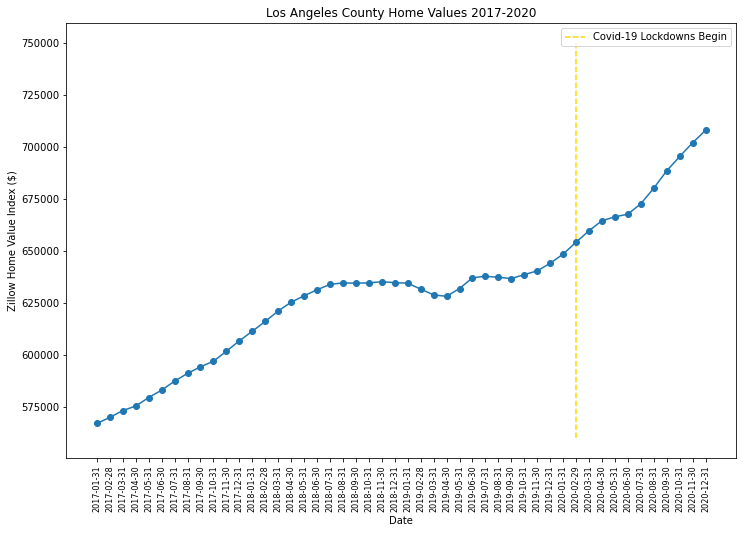

In [7]:
# Create a line plot showing ZHVI for LA County
la_cnt_filter=home_values_df['RegionName']=="Los Angeles County"

la_price_over_time=ca_df.loc[la_cnt_filter, price_columns]

plt.figure(figsize=(12,8))
plt.plot(price_columns,la_price_over_time.iloc[0], marker="o")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("Los Angeles County Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=560000, ymax=750000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/la_single_zhvi.png')
plt.show()


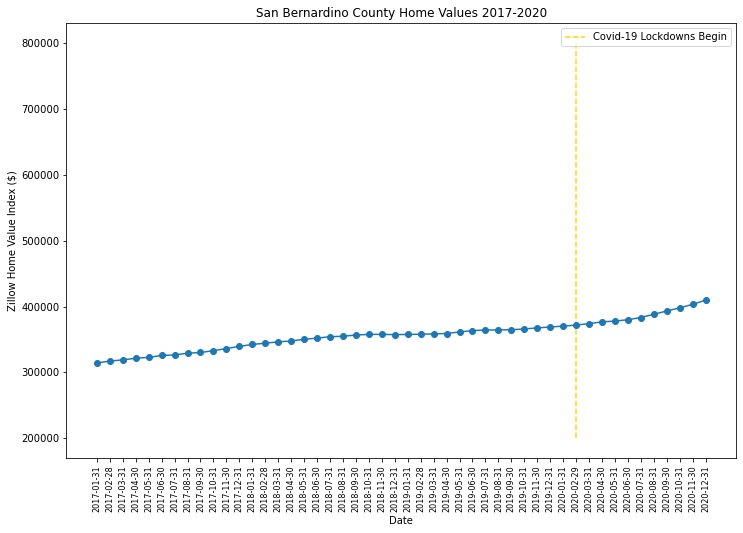

In [8]:
# Create a line plot showing ZHVI in San Bernardino County

# go through to find row where RegionName=San Bernardino County, and pull all the date values then graph. 
sanbern_cnt_filter=home_values_df['RegionName']=="San Bernardino County"

sanbern_price_over_time=ca_df.loc[sanbern_cnt_filter, price_columns]

# display(sanbern_price_over_time.iloc[0])

plt.figure(figsize=(12,8))
plt.plot(price_columns,sanbern_price_over_time.iloc[0], marker="o")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("San Bernardino County Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/sanbernadino_single_zhvi.png')
plt.show()



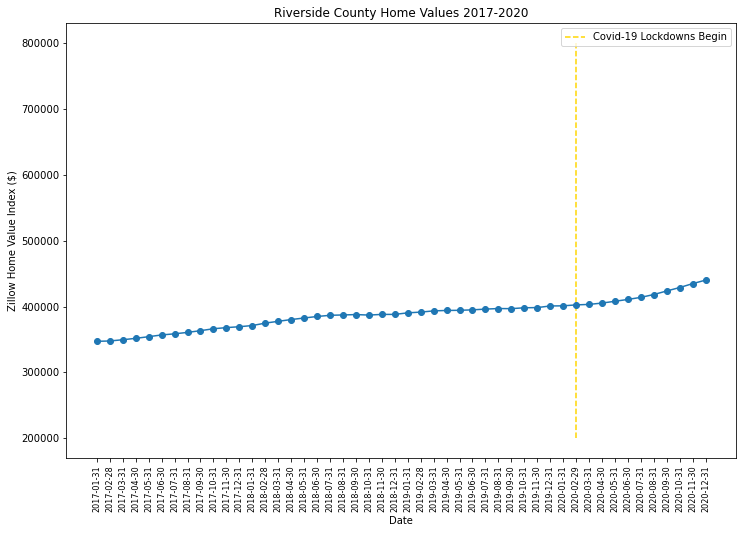

In [9]:
# Create a line plot showing ZHVI in Riverside County


# go through to find row where RegionName=San Bernardino County, and pull all the date values then graph. 
riverside_cnt_filter=home_values_df['RegionName']=="Riverside County"

riverside_price_over_time=ca_df.loc[riverside_cnt_filter, price_columns]

# display(sanbern_price_over_time.iloc[0])

plt.figure(figsize=(12,8))
plt.plot(price_columns,riverside_price_over_time.iloc[0], marker="o")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("Riverside County Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/riverside_single_zhvi.png')
plt.show()


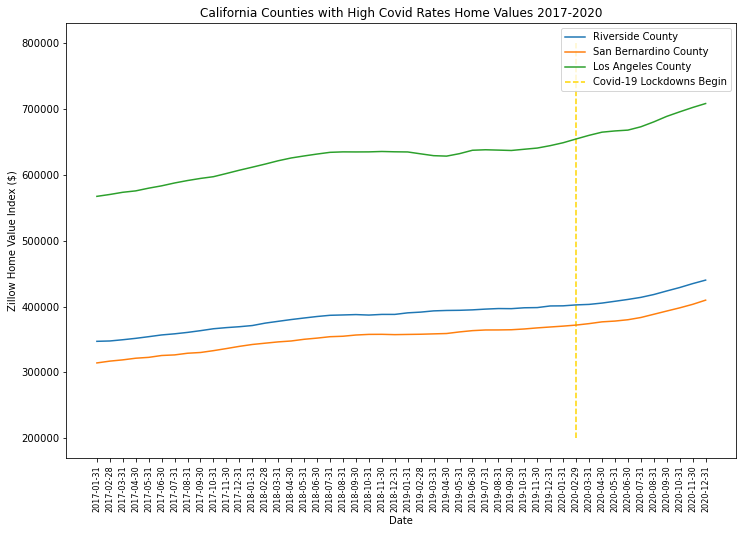

In [10]:
#Create stacked plot showing ZHVI of all three counties

plt.figure(figsize=(12,8))
plt.plot(price_columns,riverside_price_over_time.iloc[0], label="Riverside County")
plt.plot(price_columns,sanbern_price_over_time.iloc[0], label="San Bernardino County")
plt.plot(price_columns,la_price_over_time.iloc[0], label="Los Angeles County")

plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("California Counties with High Covid Rates Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/tri_county_zhvi.png')
plt.show()


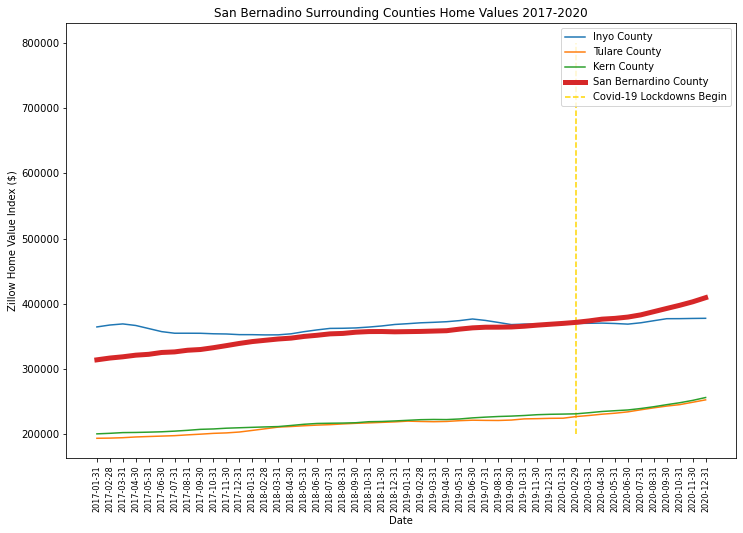

In [11]:
# create a stacked line chart showing the primary county and all the surrounding counties

inyo_filter=home_values_df['RegionName']=="Inyo County"
inyo_price_over_time=ca_df.loc[inyo_filter, price_columns]

tulare_filter=home_values_df['RegionName']=="Tulare County"
tulare_price_over_time=ca_df.loc[tulare_filter, price_columns]

kern_filter=home_values_df['RegionName']=="Kern County"
kern_price_over_time=ca_df.loc[kern_filter, price_columns]

plt.figure(figsize=(12,8))
plt.plot(price_columns,inyo_price_over_time.iloc[0], label="Inyo County")
plt.plot(price_columns,tulare_price_over_time.iloc[0], label="Tulare County")
plt.plot(price_columns,kern_price_over_time.iloc[0], label="Kern County")
plt.plot(price_columns,sanbern_price_over_time.iloc[0], label="San Bernardino County", linewidth=5.0)


plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("San Bernadino Surrounding Counties Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/sanbernadino_metro_zhvi.png')

plt.show()

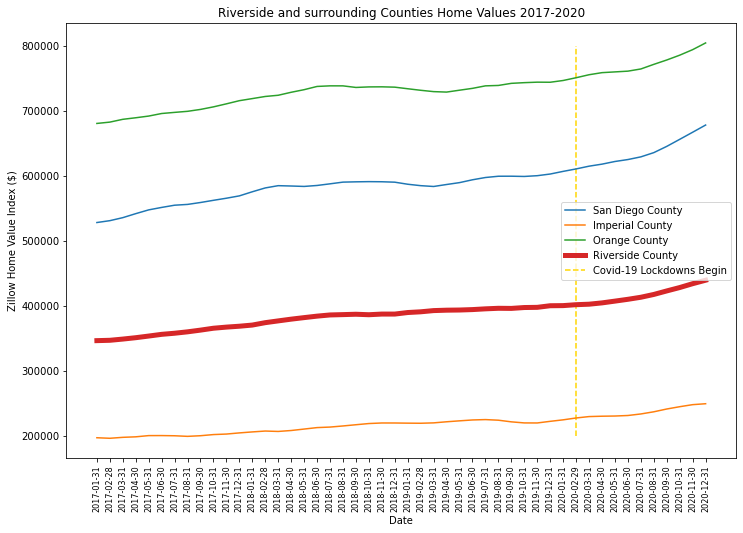

In [13]:
# Figure 2: riverside + sandiego, imperial, and orange (other surrounding county is san bernardino)


sandiego_filter=home_values_df['RegionName']=="San Diego County"
sandiego_price_over_time=ca_df.loc[sandiego_filter, price_columns]

imperial_filter=home_values_df['RegionName']=="Imperial County"
imperial_price_over_time=ca_df.loc[imperial_filter, price_columns]

orange_filter=home_values_df['RegionName']=="Orange County"
orange_price_over_time=ca_df.loc[orange_filter, price_columns]

plt.figure(figsize=(12,8))
plt.plot(price_columns,sandiego_price_over_time.iloc[0], label="San Diego County")
plt.plot(price_columns,imperial_price_over_time.iloc[0], label="Imperial County")
plt.plot(price_columns,orange_price_over_time.iloc[0], label="Orange County")
plt.plot(price_columns,riverside_price_over_time.iloc[0], label="Riverside County", linewidth=5.0)


plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("Riverside and surrounding Counties Home Values 2017-2020")
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.xticks(fontsize=8,rotation=90)
plt.legend()
plt.savefig('output/riverside_metro_zhvi.png')
plt.show()



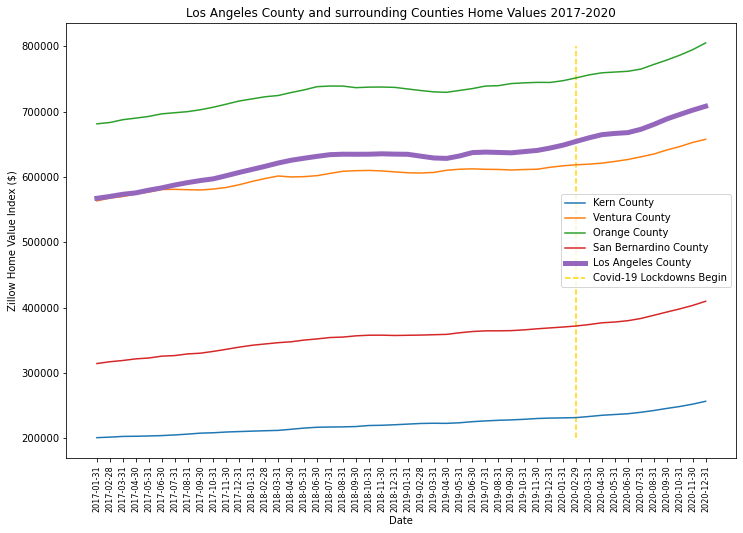

In [14]:
# figure3: la county + orange, san bernardino, kern, ventura


ventura_filter=home_values_df['RegionName']=="Ventura County"
ventura_price_over_time=ca_df.loc[ventura_filter, price_columns]


plt.figure(figsize=(12,8))
plt.plot(price_columns,kern_price_over_time.iloc[0], label="Kern County")
plt.plot(price_columns,ventura_price_over_time.iloc[0], label="Ventura County")
plt.plot(price_columns,orange_price_over_time.iloc[0], label="Orange County")
plt.plot(price_columns,sanbern_price_over_time.iloc[0], label="San Bernardino County")
plt.plot(price_columns,la_price_over_time.iloc[0], label="Los Angeles County", linewidth=5.0)

plt.xlabel("Date", fontsize=10)
plt.ylabel("Zillow Home Value Index ($)")
plt.title("Los Angeles County and surrounding Counties Home Values 2017-2020")
plt.xticks(fontsize=8,rotation=90)
plt.vlines('2020-02-29', ymin=200000, ymax=800000, colors='gold',linestyles='dashed', label='Covid-19 Lockdowns Begin')
plt.legend()
plt.savefig('output/los_angeles_metro_zhvi.png')
plt.show()